<a href="https://colab.research.google.com/github/parhambarazesh/PET575/blob/master/Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimization terminated successfully.
         Current function value: 24.661919
         Iterations: 13
         Function evaluations: 505
[34.91001815  0.43216916  0.80881315]
[   5.1069   10.2138  170.23    340.46    510.69   1021.38  ]


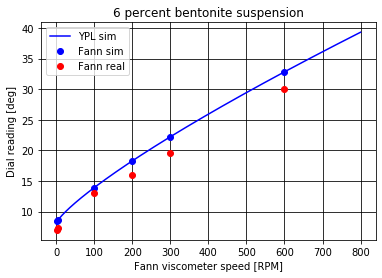

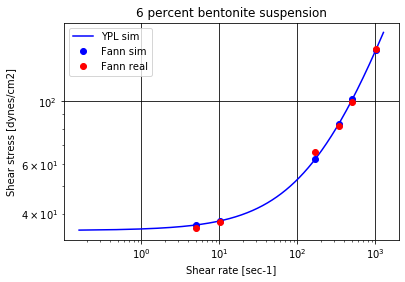

In [0]:
import numpy as np
import matplotlib.pyplot as plt
# Fann 35 data

# Defining instrument constants for Fann 35
r_c = 1.8415
r_b = 1.7245
l_b = 3.8
K_s = 363 #F1 theoretical giving A = 300

# Defining instrument constant A

A_g = ((100*60)/(8*np.pi*np.pi*l_b))*((1/(r_b*r_b))-(1/(r_c*r_c)))
A = K_s*A_g

B = ((100*60)/(0.20886*2*np.pi))*np.log(r_c/r_b)

# Herchel -Bulkley parameters

tau_0 =  38.8183
K = 0.4601
n = 0.8087

# cf for unit conversion

k1 = 1.067 # tau=1.067*theta (pound-force/foot^2)
k2 = 4.788 # pound-force/foot^2 is converted to poise
k3= 1.5943
k4 = 1.7023
# data from Fann35

xdata=np.array([3,6,100,200,300,600])
theta_Fann_real=np.array([7,7.3,13,16,19.5,30])
mudtype = '6 percent bentonite suspension'

# simulated data from Herschel-Buckley model

omega_rpm=np.arange(0.1,800,0.1)
omega_rpm_Fann=np.array([3,6,100,200,300,600])

# unit conversion 

tau_0_pp100ft = tau_0*0.20886 #convert to pound-force/foot^2
gamma = k3*omega_rpm # convert to s^-1
gamma_Fann = k3*omega_rpm_Fann # convert to s^-1

# Project a (simulation)

# the following calculations aim to calculate plastic viscosity

my_p_P= K*(gamma)**(n-1)       # in poise
my_p_P_Fann = K*(gamma_Fann)**(n-1) # in poise

my_p_cP = 100*my_p_P # centiPoise [cP]
my_p_cP_Fann = 100*my_p_P_Fann # centiPoise [cP]

# From equation(2)
theta = (my_p_cP*omega_rpm)/A + (B*tau_0_pp100ft)/A
theta_Fann = (my_p_cP_Fann*omega_rpm_Fann)/A + (B*tau_0_pp100ft)/A

plt.figure(1)
plt.plot(omega_rpm,theta,'b',omega_rpm_Fann,theta_Fann,'bo',omega_rpm_Fann,theta_Fann_real,'ro')
plt.ylabel('Dial reading [deg]')
plt.xlabel('Fann viscometer speed [RPM]')
plt.title(mudtype)
plt.legend(['YPL sim','Fann sim','Fann real'])
plt.grid(color='k')

# Regression method implemetation

gamma_Fann = k4*omega_rpm_Fann # convert to s^-1
tau_dial = k1*k2*theta_Fann_real      #in poise

X=gamma_Fann
Y=tau_dial

def objective(x):
    parameter=np.array([[5.1069,10.2138,170.23,340.46,510.69,1021.4],[35.7616,37.2942,66.4143,81.7407,99.6215,153.2639]])
    X=parameter[0,:]
    Y=parameter[1,:]
    f=0
    for i in range(0,len(X)):
        f = f+(Y[i]-x[0]-x[1]*X[i]**x[2])**2
    return f


from scipy.optimize import minimize
import numpy as np

x0=[15,.1,.9]

sol=minimize(objective,x0,method='powell',options={'disp':True})

(sol.x)
tau0_n=sol.x[0]
K_n=sol.x[1]
n_n=sol.x[2]

tau_n = tau0_n+ K_n*(gamma)**n_n;           #lbf/100ft^2
tau_Fann_n = tau0_n+ K_n*(gamma_Fann)**n_n;           #lbf/100ft^2

print(sol.x)
print(X)

plt.figure(2)
plt.loglog(gamma,tau_n,'b')
plt.loglog(gamma_Fann,tau_Fann_n,'bo')
plt.loglog(gamma_Fann,tau_dial,'ro')
plt.ylabel('Shear stress [dynes/cm2]')
plt.xlabel('Shear rate [sec-1]')
plt.title(mudtype)
plt.legend(['YPL sim','Fann sim','Fann real','BP sim'])
plt.grid(color='k')